# Reducing Readmissions: A Data Analytics Case Study for Improved Patient Care


Background:
Scenario: You are a data analyst in a large hospital's administration department in Novartis, focusing on improving patient care while reducing unnecessary readmissions. Recently, the hospital has seen a spike in readmission rates, leading to increased healthcare costs and indicating potential quality of care issues. The administration is concerned about the impact on patient outcomes and the hospital's reputation. Your task is to analyze hospital admission data to identify patterns and factors associated with high readmission rates.

Problem Statement
Addressing high readmission rates is crucial for enhancing patient care quality, optimizing hospital resource allocation, and complying with healthcare regulations. Identifying the underlying causes can lead to targeted interventions, improved patient outcomes, and potentially significant cost savings.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HA Data.csv')
df

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66582,39934,124202466,23450508,Caucasian,Female,[70-80),?,11,InternalMedicine,40,...,No,Steady,No,No,No,No,No,No,Yes,0
66583,47366,145667070,29324601,Caucasian,Male,[80-90),?,4,?,39,...,No,No,No,No,No,No,No,No,No,1
66584,76555,231061116,2179062,Caucasian,Female,[60-70),?,2,?,24,...,No,No,No,No,No,No,No,No,Yes,1
66585,25392,84911682,20531754,?,Female,[80-90),?,4,InternalMedicine,39,...,No,No,No,No,No,No,No,No,No,0


In [3]:
df
df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

 Q1:What is the distribution of readmission rates across different age groups?


In [4]:
# Analyzing readmission rates by age group
readmission_rates_by_age = df.groupby('age')['readmitted'].mean()
print(readmission_rates_by_age)

age
[0-10)      0.220000
[10-20)     0.415888
[20-30)     0.450607
[30-40)     0.420878
[40-50)     0.444972
[50-60)     0.450782
[60-70)     0.462108
[70-80)     0.480242
[80-90)     0.482762
[90-100)    0.380251
Name: readmitted, dtype: float64


Q2.Analyze the average length of hospital stays by medical specialty. Which specialties have the longest and shortest average stays?

In [5]:
average_stays_by_specialty = df.groupby('medical_specialty')['time_in_hospital'].mean()
print(average_stays_by_specialty)

medical_specialty
?                           4.395660
AllergyandImmunology        3.428571
Anesthesiology              2.444444
Anesthesiology-Pediatric    1.714286
Cardiology                  3.600757
                              ...   
Surgery-Plastic             4.685714
Surgery-Thoracic            5.960000
Surgery-Vascular            4.161560
SurgicalSpecialty           4.789474
Urology                     3.303419
Name: time_in_hospital, Length: 65, dtype: float64


Q3: How does the number of emergency visits in the previous year correlate with readmission rates?


In [6]:
correlation = df[['number_emergency', 'readmitted']].corr()
print(correlation)

                  number_emergency  readmitted
number_emergency           1.00000     0.10782
readmitted                 0.10782     1.00000


Q4. What proportion of patients with diabetes were readmitted within 30 days?

In [7]:
diabetes_readmission_proportion = df[df['diabetesMed'] == 'Yes']['readmitted'].mean()
print(diabetes_readmission_proportion)

0.4796211307489503


Q5. Is there a significant difference in readmission rates between patients with changes in diabetic medication and those without?

In [8]:
readmission_rates_by_medication_change = df.groupby('change')['readmitted'].mean()
print(readmission_rates_by_medication_change)

change
Ch    0.486202
No    0.441327
Name: readmitted, dtype: float64


Q6. Investigate the relationship between the number of lab procedures performed during the stay and readmission rates.


In [9]:
correlation_lab_readmission = df[['num_lab_procedures', 'readmitted']].corr()
print(correlation_lab_readmission)

                    num_lab_procedures  readmitted
num_lab_procedures            1.000000    0.035691
readmitted                    0.035691    1.000000


Q7. How do readmission rates vary by race and gender?


In [10]:
readmission_rates_by_race_gender = df.groupby(['race', 'gender'])['readmitted'].mean()
print(readmission_rates_by_race_gender)

race             gender         
?                Female             0.306319
                 Male               0.314839
                 Unknown/Invalid    0.000000
AfricanAmerican  Female             0.466358
                 Male               0.449287
Asian            Female             0.418605
                 Male               0.362694
Caucasian        Female             0.477517
                 Male               0.462586
Hispanic         Female             0.397790
                 Male               0.419355
Other            Female             0.395948
                 Male               0.409091
                 Unknown/Invalid    0.000000
Name: readmitted, dtype: float64


Q8. What is the distribution of patients across different weight categories, and how does this relate to readmission rates?

In [11]:
missing_weight_proportion = (df['weight'] == '?').mean()
print(missing_weight_proportion) # Proportion of missing 'weight' data


0.9679667202306756


In [12]:
readmission_rates_by_weight = df.groupby('weight')['readmitted'].mean()
print(readmission_rates_by_weight)

weight
>200         1.000000
?            0.458560
[0-25)       0.807692
[100-125)    0.586538
[125-150)    0.490385
[150-175)    0.250000
[175-200)    0.375000
[25-50)      0.576923
[50-75)      0.533997
[75-100)     0.586667
Name: readmitted, dtype: float64


Q9. Evaluate the impact of the number of medications prescribed on the length of hospital stay.


In [13]:
correlation_medications_stay = df[['num_medications', 'time_in_hospital']].corr()
print(correlation_medications_stay)

                  num_medications  time_in_hospital
num_medications          1.000000          0.466018
time_in_hospital         0.466018          1.000000


 Q10. Assess the frequency and impact of outpatient visits in the year prior to the current hospital stay on readmission rates.


In [15]:
correlation_outpatient_readmitted = df[['number_outpatient', 'readmitted']].corr()
print(correlation_outpatient_readmitted)

                   number_outpatient  readmitted
number_outpatient            1.00000     0.08159
readmitted                   0.08159     1.00000


Q11. Analyze the effect of comorbid conditions (presence of multiple diagnoses) on the length of hospital stay and readmission rates.

<Axes: title={'center': 'Readmission Rate by Comorbidity Score'}, xlabel='comorbidity_score'>

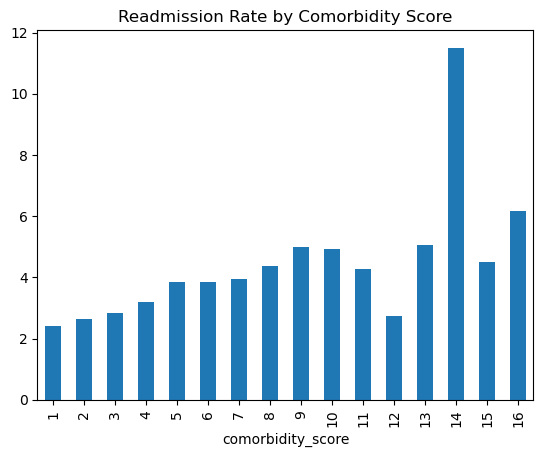

In [16]:
# Assuming 'number_diagnoses' represents comorbidity score
df['comorbidity_score'] = df['number_diagnoses']

# Analyze by grouping by comorbidity score
avg_stay_by_comorbidity = df.groupby('comorbidity_score')['time_in_hospital'].mean()
readmission_rate_by_comorbidity = df.groupby('comorbidity_score')['readmitted'].mean()

# Visualizing
avg_stay_by_comorbidity.plot(kind='bar', title='Average Stay by Comorbidity Score')
readmission_rate_by_comorbidity.plot(kind='bar', title='Readmission Rate by Comorbidity Score')

Q12. Explore the relationship between patient demographics (race, gender, age) and the type of medical interventions received (lab procedures, medications).

In [17]:
# Group by demographics and calculate averages
avg_interventions_by_demographics = df.groupby(['race', 'gender', 'age'])[['num_lab_procedures', 'num_medications']].mean()
print(avg_interventions_by_demographics )

                                num_lab_procedures  num_medications
race  gender          age                                          
?     Female          [20-30)            33.733333         8.933333
                      [30-40)            32.680000        12.720000
                      [40-50)            42.217391        15.826087
                      [50-60)            44.924528        16.905660
                      [60-70)            44.753521        15.436620
...                                            ...              ...
Other Male            [60-70)            45.587838        16.655405
                      [70-80)            46.467290        16.691589
                      [80-90)            45.162162        16.540541
                      [90-100)           35.500000        11.000000
      Unknown/Invalid [70-80)             5.000000        22.000000

[115 rows x 2 columns]


Q13.Examine the association between the number of inpatient, outpatient, and emergency visits in the previous year and the type of primary diagnosis.

In [18]:
avg_visits_by_diagnosis = df.groupby('diag_1')[['number_inpatient', 'number_outpatient', 'number_emergency']].mean()
print(avg_visits_by_diagnosis)

        number_inpatient  number_outpatient  number_emergency
diag_1                                                       
10              0.000000           0.000000          0.000000
11              0.250000           0.250000          0.000000
112             0.883721           0.302326          0.186047
114             0.000000           2.000000          0.000000
115             0.333333           0.333333          0.000000
...                  ...                ...               ...
V58             1.700565           0.604520          0.084746
V63             0.000000           0.333333          0.000000
V66             2.333333           0.000000          0.000000
V70             0.000000           0.000000          0.000000
V71             0.000000           0.600000          0.000000

[652 rows x 3 columns]


Q14. Assess the variation in medication prescribing patterns (X1 to X25) across different medical specialties and their impact on readmission rates.

In [19]:
# Assuming columns 'X1' to 'X25' represent medication indicators
medication_columns = [f'X{i}' for i in range(1, 26)]
avg_medication_use_by_specialty = df.groupby('medical_specialty')[medication_columns].mean()

print(avg_medication_use_by_specialty)

Empty DataFrame
Columns: []
Index: [?, AllergyandImmunology, Anesthesiology, Anesthesiology-Pediatric, Cardiology, Cardiology-Pediatric, DCPTEAM, Dentistry, Emergency/Trauma, Endocrinology, Endocrinology-Metabolism, Family/GeneralPractice, Gastroenterology, Gynecology, Hematology, Hematology/Oncology, Hospitalist, InfectiousDiseases, InternalMedicine, Nephrology, Neurology, Obsterics&Gynecology-GynecologicOnco, Obstetrics, ObstetricsandGynecology, Oncology, Ophthalmology, Orthopedics, Orthopedics-Reconstructive, Osteopath, Otolaryngology, OutreachServices, Pathology, Pediatrics, Pediatrics-CriticalCare, Pediatrics-EmergencyMedicine, Pediatrics-Endocrinology, Pediatrics-Hematology-Oncology, Pediatrics-Neurology, Pediatrics-Pulmonology, PhysicalMedicineandRehabilitation, PhysicianNotFound, Podiatry, Proctology, Psychiatry, Psychiatry-Addictive, Psychiatry-Child/Adolescent, Psychology, Pulmonology, Radiologist, Radiology, Rheumatology, Speech, Surgeon, Surgery-Cardiovascular, Surgery-Card

C:\Users\Amisha\AppData\Local\Temp\ipykernel_10932\180812142.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_medication_use_by_specialty = df.groupby('medical_specialty')[medication_columns].mean()


Q15. Conduct a detailed analysis of the relationship between patient weight categories and specific diagnosis codes on readmission rates.


In [20]:
readmission_rates_by_weight_diag = df.groupby(['weight', 'diag_1'])['readmitted'].mean()
print(readmission_rates_by_weight_diag)

weight    diag_1
>200      296       1.000000
          599       1.000000
?         10        0.000000
          11        0.625000
          112       0.627907
                      ...   
[75-100)  V53       0.500000
          V54       0.000000
          V55       0.000000
          V57       0.464286
          V58       1.000000
Name: readmitted, Length: 1179, dtype: float64
